In [37]:
from datetime import datetime
import time
from datetime import date
from subgrounds.subgraph import SyntheticField, FieldPath
from subgrounds.subgrounds import Subgrounds
import pandas as pd
import  os as os
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [38]:
sg = Subgrounds()
snapshot = sg.load_api('https://hub.snapshot.org/graphql')

In [39]:
snapshot.Proposal.datetime = SyntheticField(
  lambda timestamp: str(datetime.fromtimestamp(timestamp)),
  SyntheticField.STRING,
  snapshot.Proposal.end,
)

In [40]:
spacename = 'olympusdao.eth'

# based on their url, for example "curve.eth" for  https://snapshot.org/#/curve.eth
print  (spacename)

olympusdao.eth


In [41]:
proposals = snapshot.Query.proposals(
  orderBy='created',
  orderDirection='desc',
  first=1000,
  where=[
    snapshot.Proposal.space == spacename, ##'fuse.eth',
    snapshot.Proposal.state == 'closed'
    ##snapshot.Proposal.title == 'OIP-18: Reward rate framework and reduction',
  ]
)


In [42]:
proposals_snapshots = sg.query_df([
    proposals.title,
    proposals.created,
    proposals.id,
    proposals.start,
    proposals.end,
    proposals.votes
])

proposals_snapshots['createdDate']=(pd.to_datetime(proposals_snapshots['proposals_created'],unit='s'))
proposals_snapshots['startDate']=(pd.to_datetime(proposals_snapshots['proposals_start'],unit='s'))
proposals_snapshots['endDate']=(pd.to_datetime(proposals_snapshots['proposals_end'],unit='s'))
proposals_snapshots.head(10)

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate
0,OIP-136: Cross-chain native OHM as bonus proje...,1680108558,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,1680108526,1680367726,74,2023-03-29 16:49:18,2023-03-29 16:48:46,2023-04-01 16:48:46
1,TAP-22 - Treasury Segmentation,1680108259,0xebd3cf4c019ddf8eb637c816379c8b464fc20ee78284...,1680108233,1680367433,63,2023-03-29 16:44:19,2023-03-29 16:43:53,2023-04-01 16:43:53
2,OIP-135: Olympus Grants Program 1-Year Review ...,1679402793,0x246ccd5ab718a160f03e3dbbd1280ebb5389d3637946...,1679402748,1679686380,67,2023-03-21 12:46:33,2023-03-21 12:45:48,2023-03-24 19:33:00
3,AP-23 - Liquidity Incentives for Aura / Balanc...,1679325165,0xde251686e7f312a5e524ba45f4115a887e31ab6a3cb5...,1679325106,1679500800,50,2023-03-20 15:12:45,2023-03-20 15:11:46,2023-03-22 16:00:00
4,OIP 134: Hypernative as a security and risk de...,1679244244,0x58a7bc957b83e4a6424cb72d80bf3c3b0bd8025d0da1...,1679244167,1679503367,68,2023-03-19 16:44:04,2023-03-19 16:42:47,2023-03-22 16:42:47
5,OIP-133: Staking Rate Strategy,1678428395,0x0fbdc3e8adbda28970646743492623e92e3a7c2336d4...,1678428364,1678687564,76,2023-03-10 06:06:35,2023-03-10 06:06:04,2023-03-13 06:06:04
6,OIP-132: wstETH/OHM Boosted Liquidity Engine,1678427799,0x991058cca07d1e6f361217927a99951d200826e2ee57...,1678427767,1678686967,65,2023-03-10 05:56:39,2023-03-10 05:56:07,2023-03-13 05:56:07
7,OIP 131: Boosted Liquidity Engine as a Key Pro...,1678126068,0xe02d0e0d6cb2ad8e6a6512ab1d138d9ec6b64919715a...,1678125946,1678467600,80,2023-03-06 18:07:48,2023-03-06 18:05:46,2023-03-10 17:00:00
8,OIP-130: Lending AMO as a key DAO project for ...,1677691772,0x0e1173ac9585c4e46723d69ef1a4ef1995390d9d3f90...,1677691749,1677950949,55,2023-03-01 17:29:32,2023-03-01 17:29:09,2023-03-04 17:29:09
9,OOP-1 Funding request for 2023 Q1 and Q2 budget.,1677453933,0xadd0850bb53fc31df236d61e2b53326748c80ef72f54...,1677453900,1677713100,60,2023-02-26 23:25:33,2023-02-26 23:25:00,2023-03-01 23:25:00


In [43]:
total_snapshots = len(proposals_snapshots)
print(total_snapshots)

250


In [44]:
proposals_choices = sg.query(proposals.choices)
proposals_choices = pd.DataFrame(proposals_choices)
proposals_choices.head(100)

,0,1,2,3,4,5,6
0,APPROVE OIP-136 bonus project,REJECT OIP-136 bonus project,None,None,None,None,None
1,Approve TAP-22,Reject TAP-22,None,None,None,None,None
2,Approve the changes as specified,Do not approve the changes as sp,None,None,None,None,None
3,Approve Incentive Budget,Reject,None,None,None,None,None
4,For,Against,None,None,None,None,None
...,...,...,...,...,...,...,...
95,YES LETS DO IT!,NO,None,None,None,None,None
96,Yes,No,None,None,None,None,None
97,Yes,No,None,None,None,None,None
98,Yes,No,None,None,None,None,None


proposals_choices = sg.query(proposals.choices)
proposals_choices = pd.DataFrame(proposals_choices, columns = ['option_1', 'option_2', 'option_3', 'option_4', 'option_5','option_6','option_7'])
proposals_choices.head(100)

In [45]:
olympus_governance_view = pd.DataFrame()
olympus_governance_view = pd.concat([proposals_snapshots,proposals_choices], axis=1)
olympus_governance_view.head(5)

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate,0,1,2,3,4,5,6
0,OIP-136: Cross-chain native OHM as bonus proje...,1680108558,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,1680108526,1680367726,74,2023-03-29 16:49:18,2023-03-29 16:48:46,2023-04-01 16:48:46,APPROVE OIP-136 bonus project,REJECT OIP-136 bonus project,None,None,None,None,None
1,TAP-22 - Treasury Segmentation,1680108259,0xebd3cf4c019ddf8eb637c816379c8b464fc20ee78284...,1680108233,1680367433,63,2023-03-29 16:44:19,2023-03-29 16:43:53,2023-04-01 16:43:53,Approve TAP-22,Reject TAP-22,None,None,None,None,None
2,OIP-135: Olympus Grants Program 1-Year Review ...,1679402793,0x246ccd5ab718a160f03e3dbbd1280ebb5389d3637946...,1679402748,1679686380,67,2023-03-21 12:46:33,2023-03-21 12:45:48,2023-03-24 19:33:00,Approve the changes as specified,Do not approve the changes as sp,None,None,None,None,None
3,AP-23 - Liquidity Incentives for Aura / Balanc...,1679325165,0xde251686e7f312a5e524ba45f4115a887e31ab6a3cb5...,1679325106,1679500800,50,2023-03-20 15:12:45,2023-03-20 15:11:46,2023-03-22 16:00:00,Approve Incentive Budget,Reject,None,None,None,None,None
4,OIP 134: Hypernative as a security and risk de...,1679244244,0x58a7bc957b83e4a6424cb72d80bf3c3b0bd8025d0da1...,1679244167,1679503367,68,2023-03-19 16:44:04,2023-03-19 16:42:47,2023-03-22 16:42:47,For,Against,None,None,None,None,None


In [46]:
len(olympus_governance_view)

250

In [47]:
olympus_governance_view.drop_duplicates()

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate,0,1,2,3,4,5,6
0,OIP-136: Cross-chain native OHM as bonus proje...,1680108558,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,1680108526,1680367726,74,2023-03-29 16:49:18,2023-03-29 16:48:46,2023-04-01 16:48:46,APPROVE OIP-136 bonus project,REJECT OIP-136 bonus project,None,None,None,None,None
1,TAP-22 - Treasury Segmentation,1680108259,0xebd3cf4c019ddf8eb637c816379c8b464fc20ee78284...,1680108233,1680367433,63,2023-03-29 16:44:19,2023-03-29 16:43:53,2023-04-01 16:43:53,Approve TAP-22,Reject TAP-22,None,None,None,None,None
2,OIP-135: Olympus Grants Program 1-Year Review ...,1679402793,0x246ccd5ab718a160f03e3dbbd1280ebb5389d3637946...,1679402748,1679686380,67,2023-03-21 12:46:33,2023-03-21 12:45:48,2023-03-24 19:33:00,Approve the changes as specified,Do not approve the changes as sp,None,None,None,None,None
3,AP-23 - Liquidity Incentives for Aura / Balanc...,1679325165,0xde251686e7f312a5e524ba45f4115a887e31ab6a3cb5...,1679325106,1679500800,50,2023-03-20 15:12:45,2023-03-20 15:11:46,2023-03-22 16:00:00,Approve Incentive Budget,Reject,None,None,None,None,None
4,OIP 134: Hypernative as a security and risk de...,1679244244,0x58a7bc957b83e4a6424cb72d80bf3c3b0bd8025d0da1...,1679244167,1679503367,68,2023-03-19 16:44:04,2023-03-19 16:42:47,2023-03-22 16:42:47,For,Against,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,OIP-5: Lower LP Staking Rewards,1619738500,QmTrwGU99RMqTeeCKy5oW9Le9M2mXHHdNeEWzn7T67watz,1619737200,1619985600,276,2021-04-29 23:21:40,2021-04-29 23:00:00,2021-05-02 20:00:00,For: Option 1,For: Option 2,Against,None,None,None,None
246,Deposit SLP,1618764942,QmZhSNWAzrDy5KiGSeBsKBXUHW6D4vJnfCuqmdai8LPETd,1618761600,1618934400,225,2021-04-18 16:55:42,2021-04-18 16:00:00,2021-04-20 16:00:00,Deposit; keep Onsen,Deposit; no Onsen,Don't deposit,None,None,None,None
247,Loosen Policy,1618763632,QmZJb2evEjsxtLz92XBuhApWty69fVqUpFHzuVjMjCd3Se,1618761600,1618934400,229,2021-04-18 16:33:52,2021-04-18 16:00:00,2021-04-20 16:00:00,Do it,Don't do it,None,None,None,None,None
248,Add DAI Bonds,1618763184,QmUC5xa4YaWZBV7fy241svBQ8bHSMksm8kB7avk1WyWv9m,1618761600,1618934400,235,2021-04-18 16:26:24,2021-04-18 16:00:00,2021-04-20 16:00:00,Add; remove sales,Add; phase out sales,Add; keep sales,Do not add,None,None,None


In [48]:
len(olympus_governance_view)

250

In [49]:
##this captures the ENTIRE list of people who voted
voteTicker = 0
totalProposals = len(olympus_governance_view)
voteslist = pd.DataFrame()
votesDb = pd.DataFrame()
voteListLength = 1000
datediff = 0
now=0
daysAgo=0
daysLimit = 90
datediff=0
epochlimit = (90*86400)
ut = time.time()
limitTimestamp = int(ut - epochlimit)
limitDate = datetime.fromtimestamp(limitTimestamp)
limitDate = limitDate.strftime('%m-%d-%Y')
exit = False

while int(datediff) < int(daysLimit):
    proposal_id = olympus_governance_view.iloc[voteTicker,2]
    skipValue = (voteTicker)*(1000)
    vote_tracker = snapshot.Query.votes(
        #orderBy = 'created',
        #orderDirection='asc',
        first=1000,
        where=[
          snapshot.Vote.proposal == proposal_id
          #snapshot.Vote.created > limitTimestamp
        ]
    )
    voting_snapshots = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    vote_tracker.choice,
    vote_tracker.vp
    ])


    voting_snapshots['proposals_id']= olympus_governance_view.iloc[voteTicker,2]
    #voteDate = votesDb.iat[voteTicker,4]

    votesDb=pd.concat([voting_snapshots, votesDb])
    votesDb['createdDate']=(pd.to_datetime(votesDb['votes_created'],unit='s'))
    then = votesDb.iat[voteTicker,6]
    now = datetime.now()
    delta = now-then
    datediff = delta.days
    votesDbLength = len(votesDb)
    voteListLength = len(voting_snapshots)
    recordTimestamp1 = votesDb.iat[voteTicker,2]
    recordTimestamp = dt.datetime.fromtimestamp( recordTimestamp1 )
    now = (int(dt.datetime.utcnow().timestamp()))
    #datediff=abs(int(now) - recordTimestamp1)

    if int(datediff) > int(daysLimit):
        exit
    if voteTicker== totalProposals:
        exit

    print('ticker', voteTicker, 'proposal',proposal_id, 'records:',voteListLength, 'DB size:',votesDbLength, '    -days ago:', datediff, '     -date', then, '    -exit?', exit )
    #print(proposal_id, voteDate, datediff)
    voteTicker = voteTicker+1

votesDb.drop_duplicates
print("Done. Total Records collected: ", votesDbLength)

ticker 0 proposal 0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907b2e08101800196356cb0 records: 74 DB size: 74     -days ago: 4      -date 2023-04-01 16:18:43     -exit? False
ticker 1 proposal 0xebd3cf4c019ddf8eb637c816379c8b464fc20ee78284a129bbeb1456370f8c0d records: 63 DB size: 137     -days ago: 4      -date 2023-04-01 13:15:20     -exit? False
ticker 2 proposal 0x246ccd5ab718a160f03e3dbbd1280ebb5389d3637946f73f128af10995288538 records: 67 DB size: 204     -days ago: 12      -date 2023-03-24 15:58:12     -exit? False
ticker 3 proposal 0xde251686e7f312a5e524ba45f4115a887e31ab6a3cb5c2400a0f273d4db2a9c5 records: 50 DB size: 254     -days ago: 14      -date 2023-03-22 10:19:54     -exit? False
ticker 4 proposal 0x58a7bc957b83e4a6424cb72d80bf3c3b0bd8025d0da11d4717fb0a657eafcbd8 records: 68 DB size: 322     -days ago: 14      -date 2023-03-22 02:48:08     -exit? False
ticker 5 proposal 0x0fbdc3e8adbda28970646743492623e92e3a7c2336d453a07d6a090089c72ecf records: 76 DB size: 398     -days ago

In [50]:
votesDb.head(100)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,proposals_id,createdDate
0,0x75e9a9a057531880e410cbf20a782e1e81dea9eea00e...,0x24eE97586fE0B6374667ef16abF9030189568AfE,1673010290,1,16.508497,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 13:04:50
1,0x20bf5d2a46c01cd76503299a865b1365b61160243b7f...,0x9f7914f3Af230181ee5E907417a65a530dDfFACA,1673002025,1,220.073781,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 10:47:05
2,0x806dfeffbec7a44484284a5aaa641580a4d80beebc56...,0x0fADCD8D7862bB2B39d63d6a30C6b7c660c41D32,1672986902,1,35.423589,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 06:35:02
3,0x58485cd6024079d9973c8767ffd2f16ac3cefc869d49...,0x4060914d070dD6d15bfACb136a46F24022338e40,1672973839,1,19.838213,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 02:57:19
4,0xd8b0f20e080f760268b3d495158b4ad7dea745ca3a67...,0x1200Eb4fA3dF9903fC6EfF1d7A4a5D17502329b2,1672966974,1,19.645784,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 01:02:54
...,...,...,...,...,...,...,...
5,0xdbb34683175e56bd5879e232e5b8c0a6f2902ad00c34...,0xA06102d156249B577E19c20E40a76F9338b268Df,1673609625,1,58.292511,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-13 11:33:45
6,0xa40d5e9119b1d02f0d0be9151d21cdc561ec8b5c6650...,0x131D97f8a0b172b5f65712c52478fA3a35Acd83e,1673606317,1,78.444395,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-13 10:38:37
7,0xb7f71759790b0b35fdcea17daed1dcd7055f0dd3557d...,0x62af5627B911B3BE86D03C64d67f01bB2b2e3a0f,1673602653,1,17.013042,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-13 09:37:33
8,0xf460baedb4578ad176049603968d50b50015c0b3f124...,0x2A92195A610f21f8DA1801Ff9756Aaa11319Ef68,1673600003,1,11.078453,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-13 08:53:23


In [51]:
votesDb.rename(columns={"createdDate": "voteDate"}, inplace = True)
votesDb.drop_duplicates(inplace=True)
votesDb.drop_duplicates()
votesDb.head(10000)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,proposals_id,voteDate
0,0x75e9a9a057531880e410cbf20a782e1e81dea9eea00e...,0x24eE97586fE0B6374667ef16abF9030189568AfE,1673010290,1,16.508497,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 13:04:50
1,0x20bf5d2a46c01cd76503299a865b1365b61160243b7f...,0x9f7914f3Af230181ee5E907417a65a530dDfFACA,1673002025,1,220.073781,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 10:47:05
2,0x806dfeffbec7a44484284a5aaa641580a4d80beebc56...,0x0fADCD8D7862bB2B39d63d6a30C6b7c660c41D32,1672986902,1,35.423589,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 06:35:02
3,0x58485cd6024079d9973c8767ffd2f16ac3cefc869d49...,0x4060914d070dD6d15bfACb136a46F24022338e40,1672973839,1,19.838213,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 02:57:19
4,0xd8b0f20e080f760268b3d495158b4ad7dea745ca3a67...,0x1200Eb4fA3dF9903fC6EfF1d7A4a5D17502329b2,1672966974,1,19.645784,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 01:02:54
...,...,...,...,...,...,...,...
69,0xb6ba2e99d78ca66ac4261cbe3b05e3d6041418134fa0...,0x4900EB80bD15E59D221f7ffd0307B808EC6699d8,1680116772,1,379.423030,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,2023-03-29 19:06:12
70,0x9a3b282dc10d9598bdec64a0199cce24318c4956997b...,0x4e99BfBEE1020138eACC68a32eD7Fc6DD2EFc08f,1680116656,1,54.283578,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,2023-03-29 19:04:16
71,0xe7bc54be971305ef2247c14a190ef56521a353d837b5...,0x721Ca5428eC12b148b34458E0f8557F4C9624630,1680115459,1,9633.538065,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,2023-03-29 18:44:19
72,0xfc1d1c58909cd385fbc5d4f3c5795df4899edfc93d11...,0x36d9b6A89196042B5450b4687Aa7C5c315C22Aa9,1680115066,2,0.016506,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,2023-03-29 18:37:46


In [52]:
#olympus_governance_view.rename(columns={"createdDate": "voteDate"}, inplace = True)
olympus_governance_view.head(200)

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate,0,1,2,3,4,5,6
0,OIP-136: Cross-chain native OHM as bonus proje...,1680108558,0xe8117f18e79acf2e15f7254308c8d1c1138840f5c907...,1680108526,1680367726,74,2023-03-29 16:49:18,2023-03-29 16:48:46,2023-04-01 16:48:46,APPROVE OIP-136 bonus project,REJECT OIP-136 bonus project,None,None,None,None,None
1,TAP-22 - Treasury Segmentation,1680108259,0xebd3cf4c019ddf8eb637c816379c8b464fc20ee78284...,1680108233,1680367433,63,2023-03-29 16:44:19,2023-03-29 16:43:53,2023-04-01 16:43:53,Approve TAP-22,Reject TAP-22,None,None,None,None,None
2,OIP-135: Olympus Grants Program 1-Year Review ...,1679402793,0x246ccd5ab718a160f03e3dbbd1280ebb5389d3637946...,1679402748,1679686380,67,2023-03-21 12:46:33,2023-03-21 12:45:48,2023-03-24 19:33:00,Approve the changes as specified,Do not approve the changes as sp,None,None,None,None,None
3,AP-23 - Liquidity Incentives for Aura / Balanc...,1679325165,0xde251686e7f312a5e524ba45f4115a887e31ab6a3cb5...,1679325106,1679500800,50,2023-03-20 15:12:45,2023-03-20 15:11:46,2023-03-22 16:00:00,Approve Incentive Budget,Reject,None,None,None,None,None
4,OIP 134: Hypernative as a security and risk de...,1679244244,0x58a7bc957b83e4a6424cb72d80bf3c3b0bd8025d0da1...,1679244167,1679503367,68,2023-03-19 16:44:04,2023-03-19 16:42:47,2023-03-22 16:42:47,For,Against,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Add Solana to the treasury,1636135531,0x78d50cf71b8e89d105655fb5d688c95333c27a13c911...,1636135800,1637582400,276,2021-11-05 18:05:31,2021-11-05 18:10:00,2021-11-22 12:00:00,Yes,No,None,None,None,None,None
196,OIP-40: Increase ETH allocation target to 33% ...,1635946482,0x2422366345ed6a393f31a0ef53cf22834d2342349d32...,1635946500,1636205700,418,2021-11-03 13:34:42,2021-11-03 13:35:00,2021-11-06 13:35:00,For,Against,None,None,None,None,None
197,Should Olympus consider a borrowing function t...,1635807292,0x807f0e24c1d5f710ab3ac8aeb3397ca90abc30790f5a...,1635804000,1636041600,160,2021-11-01 22:54:52,2021-11-01 22:00:00,2021-11-04 16:00:00,Yes,No,None,None,None,None,None
198,Add Bitcoin to the treasury,1635795938,0x255a4e0b695ce686ab9bef5e5b7a33f2dc84b62a7d83...,1635739200,1638291600,339,2021-11-01 19:45:38,2021-11-01 04:00:00,2021-11-30 17:00:00,Yes,No,None,None,None,None,None


In [53]:
governance_data = pd.merge(votesDb, olympus_governance_view, how='inner', left_on='proposals_id', right_on='proposals_id')
governance_data.head(10)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,proposals_id,voteDate,proposals_title,proposals_created,proposals_start,...,createdDate,startDate,endDate,0,1,2,3,4,5,6
0,0x75e9a9a057531880e410cbf20a782e1e81dea9eea00e...,0x24eE97586fE0B6374667ef16abF9030189568AfE,1673010290,1,16.508497,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 13:04:50,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
1,0x20bf5d2a46c01cd76503299a865b1365b61160243b7f...,0x9f7914f3Af230181ee5E907417a65a530dDfFACA,1673002025,1,220.073781,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 10:47:05,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
2,0x806dfeffbec7a44484284a5aaa641580a4d80beebc56...,0x0fADCD8D7862bB2B39d63d6a30C6b7c660c41D32,1672986902,1,35.423589,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 06:35:02,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
3,0x58485cd6024079d9973c8767ffd2f16ac3cefc869d49...,0x4060914d070dD6d15bfACb136a46F24022338e40,1672973839,1,19.838213,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 02:57:19,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
4,0xd8b0f20e080f760268b3d495158b4ad7dea745ca3a67...,0x1200Eb4fA3dF9903fC6EfF1d7A4a5D17502329b2,1672966974,1,19.645784,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 01:02:54,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
5,0x3b4485b0eb9a32af1865aa32ccdcb6ad71f1a7ea8d89...,0xfdcF156137191e95566efedE78B804C587cAf650,1672966872,1,15.309798,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-06 01:01:12,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
6,0xedd73b07c4e74900b7d6c190fb9b3494a3d9f75eb6f3...,0x789840a82504679cCAD5c150cF138Af87a45bDec,1672953868,1,51.842488,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-05 21:24:28,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
7,0xf9455c984719790478e9dd5d2749b1ef8b15ee51960b...,0xc58BA8f7D5F0d08b93Bfd66E59f87083Ee6fAe6B,1672949816,1,135.536229,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-05 20:16:56,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
8,0x277c38ae2739d5a4b3429cda0dd680eda466ff4a5e07...,0x7672B17D5Eebb7194d57066f86FBcb4e85a7e10E,1672949537,1,2609.380233,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-05 20:12:17,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None
9,0x0473c77df6d75fa8e1fa3ace5997cfece0c5058f9e4c...,0x2D681dA119C6ac6c870C05202174e98e66d1d686,1672932312,1,1.000000,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-05 15:25:12,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,1672776262,1672776242,...,2023-01-03 20:04:22,2023-01-03 20:04:02,2023-01-06 20:04:02,Approve OIP-126,Reject OIP-126,None,None,None,None,None


In [54]:
crunch_data = db.query("select "
                           "A.proposals_id"
                       "    ,A.startDate "
                       "    ,A.proposals_title "
                       "    ,A.votes_voter "
                       "    ,A.votes_vp "
                       "    ,A.voteDate "
                           ",sum(A.votes_vp) over (Partition by proposals_id  order by votes_vp desc, voteDate asc) as cumulative_vp "
                           ",sum(A.votes_vp) over (Partition by proposals_id) as total_vp "
                           ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as percentage_of_total_vp "
                           ",((sum(A.votes_vp) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp "
                       ",round((sum(A.votes_vp) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp_stepped "
                           ",row_number() over (Partition by proposals_id order by votes_vp desc, voteDate asc) as proposal_voter_rank "

                           ",(count(*) over (Partition by proposals_id))::decimal total_voters "

                           ",(count(*) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/(count(*) over (Partition by proposals_id))::decimal percentage_voters_counted "

                           ",round(100*(count(*) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/(count(*) over (Partition by proposals_id)))::decimal percentage_voters_counted_stepped "
                       "from "
                       "    governance_data  A "
                       #"where   to_timestamp((votes_Created::bigint))<'2023-01-01' "
                       ""
                       "Group by "
                           "A.proposals_id"
                       "    ,A.startDate "
                       "    ,A.proposals_title "
                       "    ,A.votes_voter "
                       "    ,A.votes_vp "
                       "    ,A.voteDate "
                       ""
                       "Order by "
                       "    A.startDate  asc "
                       "    , votes_vp desc "
                       "    , voteDate asc"
                       "").df()


crunch_data.insert(0, 'DAO', spacename)
crunch_data.drop_duplicates
crunch_data.head(100)


,DAO,proposals_id,startDate,proposals_title,votes_voter,votes_vp,voteDate,cumulative_vp,total_vp,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped
0,olympusdao.eth,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-03 20:04:02,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,0xfFe8194426050cCA662BCb67213C813148327b32,34643.923866,2023-01-05 14:07:45,34643.923866,82122.502623,0.421857,0.421857,0.0,1,90.0,0.011111,1.0
1,olympusdao.eth,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-03 20:04:02,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,0xD3474BD2f558B12e83810EC7d8aF14f2d1D08137,8876.151824,2023-01-04 03:15:22,43520.075691,82122.502623,0.108084,0.529941,1.0,2,90.0,0.022222,2.0
2,olympusdao.eth,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-03 20:04:02,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,0x721Ca5428eC12b148b34458E0f8557F4C9624630,5562.603881,2023-01-03 20:15:32,49082.679572,82122.502623,0.067735,0.597676,1.0,3,90.0,0.033333,3.0
3,olympusdao.eth,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-03 20:04:02,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,0x3213977900A71e183818472e795c76aF8cbC3a3E,2903.004210,2023-01-04 09:09:11,51985.683782,82122.502623,0.035350,0.633026,1.0,4,90.0,0.044444,4.0
4,olympusdao.eth,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-03 20:04:02,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,0x7672B17D5Eebb7194d57066f86FBcb4e85a7e10E,2609.380233,2023-01-05 20:12:17,54595.064015,82122.502623,0.031774,0.664800,1.0,5,90.0,0.055556,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,olympusdao.eth,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-10 17:51:20,TAP-17 Aura Acquisition,0x818ff5c4f15855ee497B8a0C8ffcCb066306A84d,2594.236032,2023-01-12 16:44:04,37935.040374,59967.658079,0.043261,0.632592,1.0,6,93.0,0.064516,6.0
96,olympusdao.eth,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-10 17:51:20,TAP-17 Aura Acquisition,0x16ff8Ad104Fa6195260A6d4A3F311c5f120dF77d,2482.318396,2023-01-11 17:52:53,40417.358770,59967.658079,0.041394,0.673986,1.0,7,93.0,0.075269,8.0
97,olympusdao.eth,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-10 17:51:20,TAP-17 Aura Acquisition,0x830f21710EAf94a1c14484E48d9B34206C263dd7,2351.195826,2023-01-12 21:05:11,42768.554596,59967.658079,0.039208,0.713194,1.0,8,93.0,0.086022,9.0
98,olympusdao.eth,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-10 17:51:20,TAP-17 Aura Acquisition,0x1C0E7f67CE7a4F33F9D7f1a657a9c0e8D5b02aeb,2264.436847,2023-01-13 02:49:28,45032.991443,59967.658079,0.037761,0.750955,1.0,9,93.0,0.096774,10.0


In [71]:
#leaders = crunch_data.loc[crunch_data['proposal_voter_rank'] <=3]
#leader_count = leaders.votes_voter.nunique()
#leader_count
#DONT ASK ME WHY THIS DIDNT WORK. HAVE TO DO IT THE UGLY WAY

leader_ranks = db.query("with leader_ranks as "
                        "(Select distinct "
                        "   B.proposals_id"
                        "   ,B.votes_voter"
                        "   ,B.proposal_voter_rank "
                        "   ,(B.proposal_voter_rank +1) as leader_rank "
                        "From "
                        "   (select "
                               "proposals_id"
                               ",votes_voter "
                               ",votes_choice"
                               ",votes_vp"
                               ",votes_created  "
                               ",sum(votes_vp) over (Partition by proposals_id  order by votes_vp desc, votes_created asc) as cumulative_vp"
                               ",sum(votes_vp) over (Partition by proposals_id) as total_vp"
                               ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as percentage_of_total_vp "
                               ",((sum(votes_vp) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp "
                           "    ,round((sum(votes_vp) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp_stepped "
                               ",row_number() over (Partition by proposals_id order by votes_vp desc, votes_created asc) as proposal_voter_rank "
                               ",count(votes_voter) over (Partition by proposals_id  order by votes_vp desc, votes_created asc) total_voters "
                               ",(count(*) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by proposals_id))::decimal percentage_voters_counted "
                               ",round(100*(count(*) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by proposals_id)))::decimal percentage_voters_counted_stepped "
                           "from "
                           "    governance_data  "
                               ""
                           "Group by "
                           "    proposals_id"
                           "    ,votes_voter"
                           "    ,votes_choice"
                           "    , votes_vp "
                           "    , votes_created "
                           ""
                           "Order by "
                           "    proposals_id "
                           "    ,votes_vp desc "
                           "    , votes_created asc) B "
                        "where "
                        "   B.cum_percentage_of_total_vp<=0.5) "
                        ""
                        "Select "
                        "   *"
                        "From crunch_data A"
                        "   Join leader_ranks B on A.proposal_voter_rank = B.leader_rank and A.proposals_id = B.proposals_id"
                        ""
                    ).df()
leader_ranks


,DAO,proposals_id,startDate,proposals_title,votes_voter,votes_vp,voteDate,cumulative_vp,total_vp,percentage_of_total_vp,...,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped,proposals_id_2,proposal,votes_voter_2,proposal_voter_rank_2,leader_rank
0,olympusdao.eth,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,2023-01-03 20:04:02,[OIP-126] Self-Repaying OHM: Alchemix alOHM La...,0xD3474BD2f558B12e83810EC7d8aF14f2d1D08137,8876.151824,2023-01-04 03:15:22,43520.075691,82122.502623,0.108084,...,1.0,2,90.0,0.022222,2.0,0x058bda9a27ba8e0e154df38fdd6f41e59c640a44cd62...,OIP-126,0xfFe8194426050cCA662BCb67213C813148327b32,1,2
1,olympusdao.eth,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-10 17:51:20,TAP-17 Aura Acquisition,0x721Ca5428eC12b148b34458E0f8557F4C9624630,8923.019580,2023-01-10 22:02:52,20933.609998,59967.658079,0.148797,...,0.0,2,93.0,0.021505,2.0,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,AP-17 A,0xca6aA0576c2ADc79d2c20e6D53c07f590f62932A,1,2
2,olympusdao.eth,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-10 17:51:20,TAP-17 Aura Acquisition,0xD3474BD2f558B12e83810EC7d8aF14f2d1D08137,8887.661816,2023-01-12 11:27:28,29821.271814,59967.658079,0.148208,...,0.0,3,93.0,0.032258,3.0,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,AP-17 A,0x721Ca5428eC12b148b34458E0f8557F4C9624630,2,3
3,olympusdao.eth,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,2023-01-10 17:51:20,TAP-17 Aura Acquisition,0x3213977900A71e183818472e795c76aF8cbC3a3E,2906.768629,2023-01-12 08:18:24,32728.040442,59967.658079,0.048472,...,1.0,4,93.0,0.043011,4.0,0x5b06e73b9744a5f224d5ec0ac0e4b3411fdcb5eaa190...,AP-17 A,0xD3474BD2f558B12e83810EC7d8aF14f2d1D08137,3,4
4,olympusdao.eth,0xda3c3616164ae0674c1df2f54cc5734e8af86b99fe0c...,2023-01-12 13:33:03,OIP-127 OHM Lending Markets Pilot Programme,0x721Ca5428eC12b148b34458E0f8557F4C9624630,8925.186451,2023-01-12 19:16:46,26657.873669,57033.846504,0.156489,...,0.0,2,60.0,0.033333,3.0,0xda3c3616164ae0674c1df2f54cc5734e8af86b99fe0c...,IP-127,0x922d012c7E8fCe3C46ac761179Bdb6d16246782D,1,2
5,olympusdao.eth,0xda3c3616164ae0674c1df2f54cc5734e8af86b99fe0c...,2023-01-12 13:33:03,OIP-127 OHM Lending Markets Pilot Programme,0xC45d45b54045074Ed12d1Fe127f714f8aCE46f8c,8763.882870,2023-01-12 21:02:50,35421.756538,57033.846504,0.153661,...,1.0,3,60.0,0.050000,5.0,0xda3c3616164ae0674c1df2f54cc5734e8af86b99fe0c...,IP-127,0x721Ca5428eC12b148b34458E0f8557F4C9624630,2,3
6,olympusdao.eth,0x0aa9d7913eeaa0bde3b502b02aec8e407fd0898a773d...,2023-01-16 16:24:25,TAP-16 Pilot Opyn Strategies Deposits,0x922d012c7E8fCe3C46ac761179Bdb6d16246782D,17743.308903,2023-01-17 04:51:02,50973.719132,96754.454398,0.183385,...,1.0,2,88.0,0.022727,2.0,0x0aa9d7913eeaa0bde3b502b02aec8e407fd0898a773d...,AP-16 P,0x7E7afAAfd27F723E7178cB439982ad286508Febc,1,2
7,olympusdao.eth,0x5c3b454300357b90e4dbe1866a20b02010dcaa7a7407...,2023-01-18 19:31:01,TAP-18: DAI Savings Rate Deposit,0xca6aA0576c2ADc79d2c20e6D53c07f590f62932A,11520.911704,2023-01-18 19:49:21,24632.410316,51928.290886,0.221862,...,0.0,2,50.0,0.040000,4.0,0x5c3b454300357b90e4dbe1866a20b02010dcaa7a7407...,AP-18:,0x7DD19A3a93c7008BFBdD66375aAc8C115A886a28,1,2
8,olympusdao.eth,0x5c3b454300357b90e4dbe1866a20b02010dcaa7a7407...,2023-01-18 19:31:01,TAP-18: DAI Savings Rate Deposit,0x721Ca5428eC12b148b34458E0f8557F4C9624630,8931.688755,2023-01-18 19:57:31,33564.099071,51928.290886,0.172000,...,1.0,3,50.0,0.060000,6.0,0x5c3b454300357b90e4dbe1866a20b02010dcaa7a7407...,AP-18:,0xca6aA0576c2ADc79d2c20e6D53c07f590f62932A,2,3
9,olympusdao.eth,0x5a8c1550f2781d7c1587bf74a793a87f149774c6b5c3...,2023-01-30 19:46:06,TAP-19 Deposit OHM-ETH & OHM-DAI POL into Aura...,0x5E11A833d112e973661040E062F1aEdFB2BCEc1d,14491.344057,2023-02-02 19:19:28,47757.911673,117883.399033,0.122929,...,0.0,2,92.0,0.021739,2.0,0x5a8c1550f2781d7c1587bf74a793a87f149774c6b5c3...,AP-19 D,0x7E7afAAfd27F723E7178cB439982ad286508Febc,1,2


In [56]:
dao_members = crunch_data.groupby('DAO').votes_voter.nunique()
dao_members = dao_members.iloc[0]
leader_count =leader_ranks.votes_voter.nunique()
elite = round((leader_count)/(dao_members),4)

print(dao_members, "{0:.2%}".format(elite))


426 3.99%


In [69]:
curve_data = db.query(
    "SELECT "
    "   percentage_voters_counted_stepped "
    "   ,percentage_voters_counted "
    "   ,cum_percentage_of_total_vp "
    "   ,SUBSTRING(proposals_title,2,7) proposal "
    "FROM crunch_data "
    "union all "
    "select "
    "   percentage_voters_counted_stepped "
    "   , avg(percentage_voters_counted) avg_percentage_voters_counted "
    "   , avg(cum_percentage_of_total_vp) avg_percentage_of_total_vp "
    "   ,'Grand Average' as proposal "
    "from crunch_data "
    " group by 1 "
     ).df()

curve_data.head(200)



,percentage_voters_counted_stepped,percentage_voters_counted,cum_percentage_of_total_vp,proposal
0,1.0,0.011111,0.421857,OIP-126
1,2.0,0.022222,0.529941,OIP-126
2,3.0,0.033333,0.597676,OIP-126
3,4.0,0.044444,0.633026,OIP-126
4,6.0,0.055556,0.664800,OIP-126
...,...,...,...,...
195,22.0,0.216667,0.938851,IP-127
196,23.0,0.233333,0.949116,IP-127
197,25.0,0.250000,0.958282,IP-127
198,27.0,0.266667,0.965874,IP-127


In [24]:
file = input('Selet a folder to save output') ##enter your file path here - the file is in the repo "summary_stats.csv".

In [25]:
path =file+'/'+spacename+'_olympus_governance_data_'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
governance_data.to_csv(path, index = False)

In [314]:
path =file+'/'+spacename+'_olympus_crunch_data_'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
crunch_data.to_csv(path, index = False)

In [34]:
path =file+'/'+spacename+'_olympus_curve_data_'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
curve_data.to_csv(path, index = False)

C:\Users\ianfe\AppData\Local\Temp\ipykernel_5780\1510506157.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()


AxesSubplot(0.125,0.125;0.775x0.755)


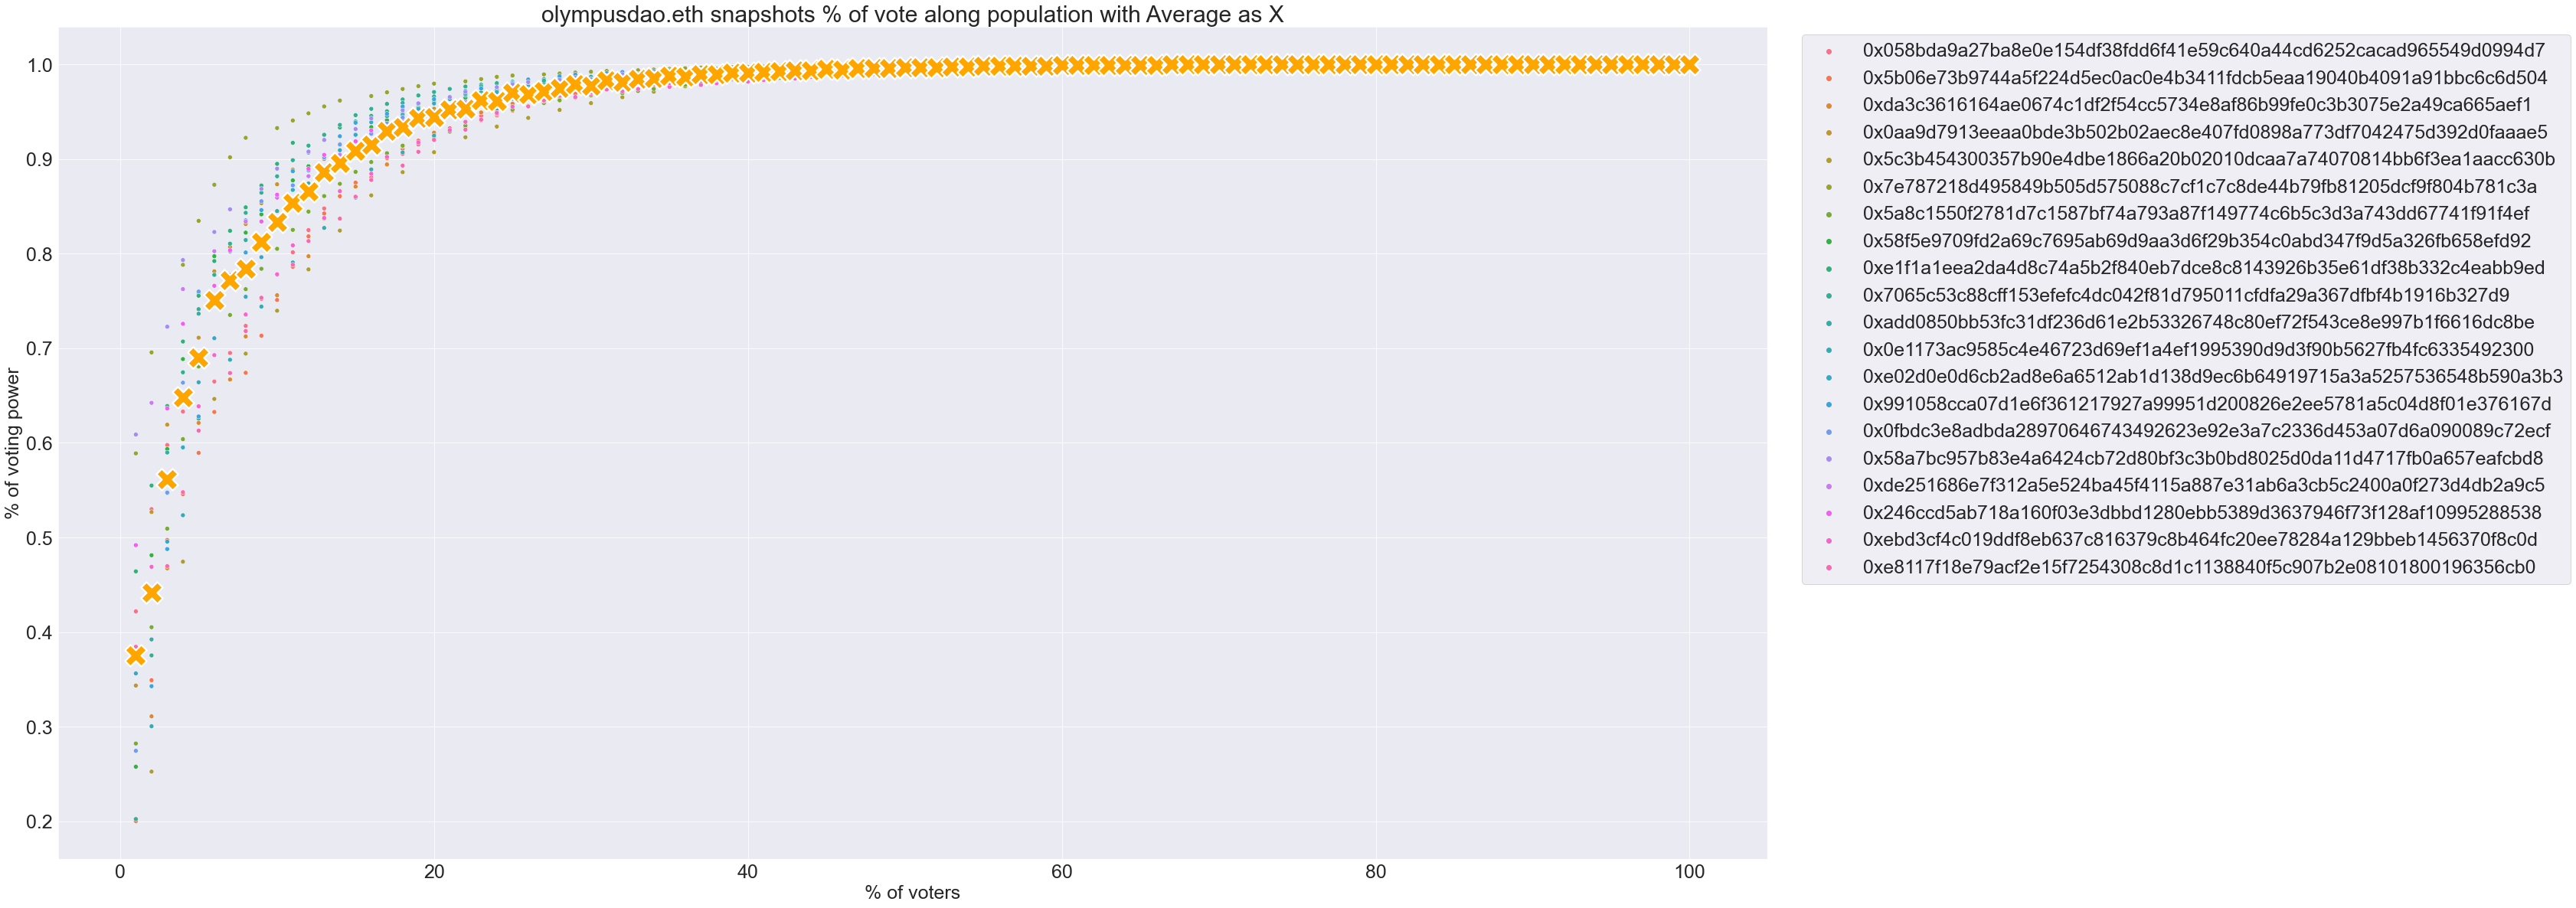

In [73]:
plt.rc("figure", figsize=(40, 20))
#sns.set_style("whitegrid")
plt.rc("font", size=25)
data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()
##print(data_means)
plot_title = spacename + ' snapshots % of vote along population with Average as X'

ax=sns.scatterplot(data=crunch_data, hue = "proposals_id",y="cum_percentage_of_total_vp",x="percentage_voters_counted_stepped").set(title=plot_title,xlabel='% of voters',ylabel='% of voting power')
chart = sns.scatterplot(data=data_means,x="percentage_voters_counted_stepped",y="cum_percentage_of_total_vp",zorder=3, s=800,marker='X',color = 'orange')
plt.legend(bbox_to_anchor=(1.02, 0.99), loc='upper left', borderaxespad=0)
#and save the chart file, too
print(chart)
plt.savefig(file+'\\'+spacename+' vote power distribution.png',transparent =False,  dpi=100)